# Monte Carlo methods

- MC integration: estimate the value of `pi`
- MC simulation: simulate the exponential law

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
M = 0

X, Y = [], []
Z = []
E = []
V = []

np.random.seed(100)

for i in range(1, N+1):
    x, y = np.random.random(2)
    
    if pow(x, 2) + pow(y, 2) <= 1.0:
        M+=1
        label = 1
    else:
        label = 0
    
    estimate = M/i * 4
    error = (estimate - np.pi) / np.pi
    variance = i / (i - 1) * (1 / i* 4 * M - estimate) if i != 1 else 0 
    
    X.append((x, y))
    Y.append(label)
    Z.append(estimate)
    V.append(variance)
    E.append(error)
    
    if i % 1000 == 0:
        print("Estimation at {:08d}: {:8f}   variance: {}".format(i, estimate, variance)) 

print("Final estimate at {}: {}".format(N, M/N * 4))

X = np.asarray(X)
Y = np.asarray(Y)
Z = np.asarray(Z)
E = np.asarray(E)


Estimation at 00001000: 3.256000   variance: 4.445337435936563e-16
Estimation at 00002000: 3.180000   variance: 0.0
Estimation at 00003000: 3.150667   variance: 0.0
Estimation at 00004000: 3.155000   variance: 4.442002599150414e-16
Estimation at 00005000: 3.156000   variance: 0.0
Estimation at 00006000: 3.163333   variance: -4.441632370562386e-16
Estimation at 00007000: 3.168000   variance: 0.0
Estimation at 00008000: 3.162000   variance: 0.0
Estimation at 00009000: 3.160000   variance: 0.0
Estimation at 00010000: 3.152800   variance: 0.0
Final estimate at 10000: 3.1528


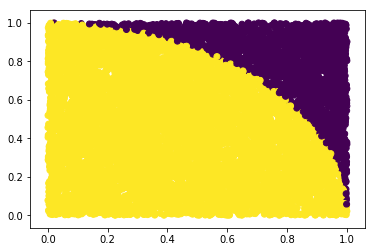

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

The variance of MC estimate is:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/bc2fdfc9d462cd6aa1e2f3729c7e066b47bc0c69)

And the error:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f6417da12c4c976168bccb76fb45d5dd47c0043b)

decreases as 1/sqrt(N)

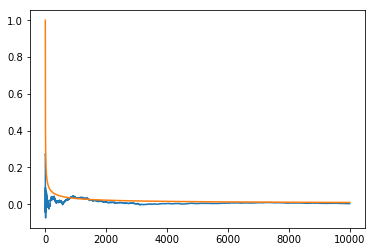

In [3]:
plt.plot(np.arange(N), E)
plt.plot(np.arange(N)[1:], 1/np.sqrt(np.arange(N)[1:]))

### Variance Reduction: Importance Sampling

One technique to reduce the variance of the estimate is _Importance Sampling_

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4bf3d1eca0f8c6a897398f625fdc2bf31b0422e2)

where:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c0dcd57fa9156c7a83a08a0c2bfbd8bab9f211fe)

p(x) is the importance sampling distribution.

## Simulation of laws

Proposition 4.1 [1] gives us a way to simulate distributions.

Let's do it for an _exponential law_:


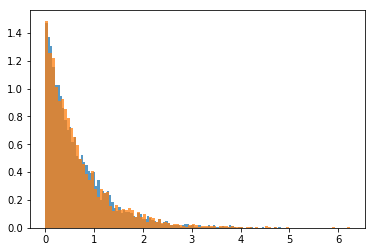

In [4]:
# exponential law
import numpy as np

lambda_ = 1.5
exp_law_monte_carlo = lambda u: - np.log(u)/lambda_

N = 5000
Y = []
for i in range(N):
    y = exp_law_monte_carlo(np.random.random())
    Y.append(y)
    
Y = np.asarray(Y)

plt.hist(Y, 100, density=True, alpha=0.75)
plt.hist(np.random.exponential(1/lambda_, N), 100, density=True, alpha=0.75)
plt.show()

## References

- [1] [http://cermics.enpc.fr/~bl/Halmstad/monte-carlo/lecture-1.pdf](http://cermics.enpc.fr/~bl/Halmstad/monte-carlo/lecture-1.pdf)
- [2] [Monte Carlo and quasi-Monte Carlo methods](https://pdfs.semanticscholar.org/85b5/97939f26a4f7a149887e00e83e2f5ba35c8f.pdf)
- [3] [https://en.wikipedia.org/wiki/Monte_Carlo_integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration)
- [4] [Monte Carlo Methods by Kroese (notes)](https://people.smp.uq.edu.au/DirkKroese/mccourse.pdf)